<a href="https://colab.research.google.com/github/phanng0605/titanicdataset/blob/main/Titanic_dataset_using_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

**Drop labels that are unnecessary**

In [ ]:
data_test.drop(labels=['Ticket' , 'PassengerId' , 'Name' , 'Cabin'], axis=1 , inplace = True)
data_train.drop(labels=['Ticket' , 'PassengerId', 'Name', 'Cabin'], axis=1 , inplace = True)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Get dummies to convert non-numerical data to binary**

In [ ]:
data_train = pd.get_dummies(data_train, columns = ['Sex'],prefix='Sex') 
data_test = pd.get_dummies(data_test, columns = ['Sex'], prefix = 'Sex')

In [ ]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [ ]:
data_test = pd.get_dummies(data_test, columns = ['Embarked'], prefix='Embarked')
data_train = pd.get_dummies(data_train, columns = ['Embarked'], prefix = 'Embarked')
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


**Split data set into target and training**

In [ ]:
X = data_train.loc[ : , data_train.columns != 'Survived']
y = data_train['Survived']

In [ ]:
y.head()
X[0:5]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


**Deal with NaN data**

In [ ]:
imputer = KNNImputer(n_neighbors = 5)

In [ ]:
imputer.fit(X)

KNNImputer()

In [ ]:
X = imputer.transform(X)

In [ ]:
data_test = imputer.transform(data_test)

**Model initialisation**

In [ ]:
model = DecisionTreeClassifier( criterion = 'entropy',max_depth = 7, min_samples_split = 6)

In [ ]:
cross_val_score(model, X, y, cv=10).mean()

0.8160174781523096

In [ ]:
print('Score: ', model.score(X,y))

Score:  0.8686868686868687


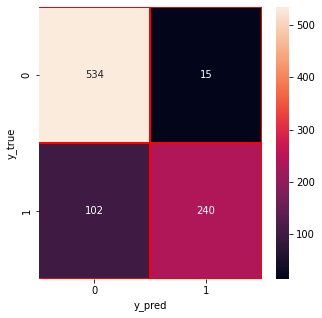

In [ ]:
y_pred = model.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Fit data into model**

In [ ]:
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)

**Make prediction**

In [ ]:
data_test_bonus = pd.read_csv('test.csv')

In [ ]:
prediction = model.predict(data_test)
df_prediction = pd.DataFrame(prediction, columns = ['Survived'])
df_prediction['PassengerId'] = data_test_bonus['PassengerId']
df_prediction[0:10]

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
5,0,897
6,1,898
7,0,899
8,1,900
9,0,901
